In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Step 1: Load the dataset
# Make sure 'sales_data_sample.csv' is in the same directory
data = pd.read_csv("sales_data_sample.csv", encoding='latin1')

# Step 2: Display dataset info
print("Dataset Shape:", data.shape)
print(data.head())

Dataset Shape: (2823, 25)
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue

In [4]:
# Step 3: Select relevant numerical features for clustering
# (You can adjust columns as needed)
numeric_features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']

# Drop rows with missing values in selected columns
df = data[numeric_features].dropna()

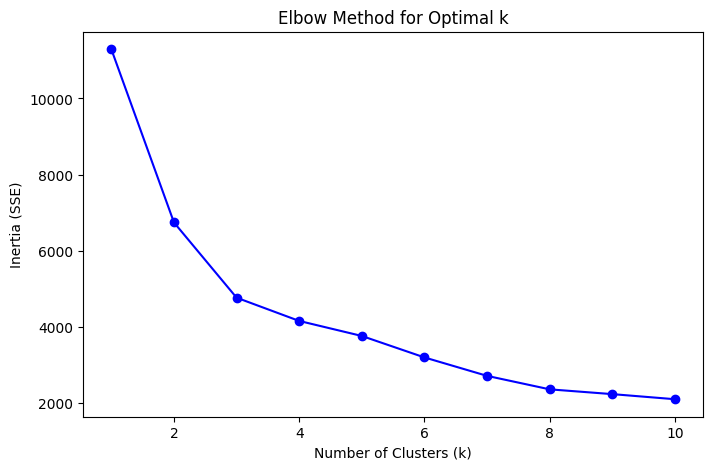

In [5]:
# Step 4: Scale the data (important for clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 5: Use the Elbow Method to find the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Step 6: Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()


Cluster Centers (in scaled form):
[[-0.76691781  0.58371892 -0.23319803  0.31086649]
 [ 0.01184799 -1.19516781 -0.78891227 -0.9101341 ]
 [ 0.88686139  0.68557309  1.1787307   0.67898352]]

Cluster Counts:
Cluster
0    997
1    975
2    851
Name: count, dtype: int64


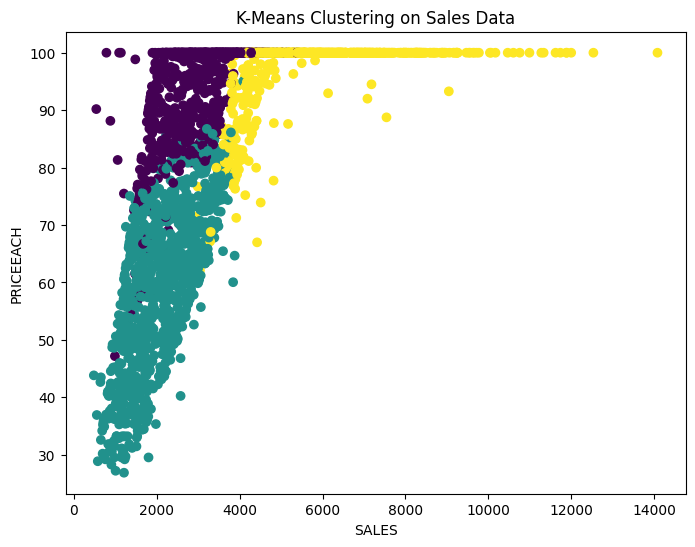

In [6]:
# Step 7: Apply K-Means with the chosen number of clusters (e.g., k=3)
optimal_k = 3  # Change based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 8: Display cluster centers and count
print("\nCluster Centers (in scaled form):")
print(kmeans.cluster_centers_)

print("\nCluster Counts:")
print(df['Cluster'].value_counts())

# Step 9: Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['SALES'], df['PRICEEACH'], c=df['Cluster'], cmap='viridis')
plt.xlabel('SALES')
plt.ylabel('PRICEEACH')
plt.title('K-Means Clustering on Sales Data')
plt.show()

In [7]:
# 🧩 K-MEANS CLUSTERING ON SALES DATA — EXPLANATION 🧩
# -------------------------------------------------------
# This project performs **Customer/Sales Data Segmentation** using the **K-Means Clustering Algorithm**.
#
# The dataset "sales_data_sample.csv" is first loaded and a few important numerical features such as 
# 'QUANTITYORDERED', 'PRICEEACH', 'SALES', and 'MSRP' are selected for clustering analysis.
# These features represent product quantity, unit price, total sale value, and market suggested retail price.
#
# Since clustering depends on distance calculations, the data is standardized using **StandardScaler** 
# to ensure all features have equal weight (mean = 0, standard deviation = 1).
#
# To decide the optimal number of clusters (k), the **Elbow Method** is used — 
# where models are trained for k = 1 to 10, and the corresponding **inertia (SSE)** values are plotted.  
# The “elbow point” in this curve indicates the best number of clusters (usually where SSE starts flattening).
#
# After choosing an optimal k (e.g., 3), the **KMeans algorithm** groups similar sales patterns together 
# based on numerical similarity. Each row in the dataset is assigned a cluster label (0, 1, or 2).
#
# Cluster centers (in scaled form) represent the average feature values for each group, 
# and cluster counts show how many data points belong to each segment.
#
# Finally, the clusters are visualized using a **scatter plot of SALES vs PRICEEACH**, 
# with different colors representing different customer/product groups.  
# This helps in identifying trends like high-price-high-sale products or low-price-mass-sale segments.
